# **Description of the dataset**

Dataset - Big Kickstarter.         
Columns - product blurb and state (successful/fail)

Objective - we need to conduct analysis on product blurbs and what keywords determine if a product is successful or not on kickstarter. Also, whether the wordiness of a product blurb may affect a product to be successful or not successful.  

In [ ]:
#Mounting Google Drive to pass on documents easier
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **1.Examine the dataset**

In [ ]:
import pandas as pd
big_kickstarter = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/big kickstarter data 2.csv')
#big_kickstarter = pd.read_csv('/content/big kickstarter data 2.csv')

In [ ]:
big_kickstarter.shape

(215513, 3)

In [ ]:
big_kickstarter.head()

,Unnamed: 0,blurb,state
0,1,"Using their own character, users go on educati...",failed
1,2,"MicroFly is a quadcopter packed with WiFi, 6 s...",successful
2,3,"A small indie press, run as a collective for a...",failed
3,4,Zylor is a new baby cosplayer! Back this kicks...,failed
4,5,Hatoful Boyfriend meet Skeletons! A comedy Dat...,failed


In [ ]:
#Check the first blurb
big_kickstarter.loc[0, 'blurb']

'Using their own character, users go on educational quests around a virtual world leveling up subject-oriented skills (ie Physics).'

In [ ]:
#Examine the blurbs that are successful
big_kickstarter[big_kickstarter.state == "successful"]

,Unnamed: 0,blurb,state
1,2,"MicroFly is a quadcopter packed with WiFi, 6 s...",successful
182,183,Meow!! Cat Box is a simple and clever card gam...,successful
183,184,"A fast, fun, easy-to-learn, and easy-to-play s...",successful
184,185,"An awesome place to play games, make friends a...",successful
185,186,Trenchworx is excited to launch our third Kick...,successful
...,...,...,...
215154,215155,SMFA students take on collaborative art projec...,successful
215155,215156,Between Cities Installation AND Jen Grabarczyk...,successful
215156,215157,An interdisciplinary art project in the Svalba...,successful
215157,215158,This is a great poetry book that includes art ...,successful


In [ ]:
big_kickstarter[big_kickstarter.state == "failed"]

,Unnamed: 0,blurb,state
0,1,"Using their own character, users go on educati...",failed
2,3,"A small indie press, run as a collective for a...",failed
3,4,Zylor is a new baby cosplayer! Back this kicks...,failed
4,5,Hatoful Boyfriend meet Skeletons! A comedy Dat...,failed
5,6,FastMan is a Infinite running platformer. Go i...,failed
...,...,...,...
215508,215509,"This new, designer approach to family wall art...",failed
215509,215510,Im looking to build a urban youth center to he...,failed
215510,215511,My plan is to create the most realistic and ac...,failed
215511,215512,Create unique and fantastic gifts: Mash works ...,failed


# **2. Remove Null Values**

In [ ]:
#Remove the null values
big_kickstarter.isnull().sum()

Unnamed: 0    0
blurb         3
state         0
dtype: int64

In [ ]:
big_kickstarter.dropna(axis = 0, inplace=True)

In [ ]:
big_kickstarter.isnull().sum()

Unnamed: 0    0
blurb         0
state         0
dtype: int64

In [ ]:
big_kickstarter.shape

(215510, 3)

In [ ]:
#Binned successful into 1 and failed into 0
big_kickstarter.replace(regex={r'failed': 0, r'successful': 1}, inplace = True)

# **3. Removing Stopwords**

In [ ]:
#importing and downloading NLTK
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
big_kickstarter.dtypes

Unnamed: 0     int64
blurb         object
state          int64
dtype: object

In [ ]:
big_kickstarter['blurb'] = big_kickstarter['blurb'].astype(str)

In [ ]:
#Removing stopwords from text
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

def remove_stopwords(text):
    textArr = text.split(' ')
    rem_text = " ".join([i for i in textArr if i not in stop_words])
    return rem_text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#Make every blurb lower case
big_kickstarter['blurb'] = big_kickstarter['blurb'].str.lower()

In [ ]:
big_kickstarter['blurb']=big_kickstarter['blurb'].apply(remove_stopwords)

In [ ]:
big_kickstarter.head()

,Unnamed: 0,blurb,state
0,1,"using character, users go educational quests a...",0
1,2,"microfly quadcopter packed wifi, 6 sensors, 3 ...",1
2,3,"small indie press, run collective authors want...",0
3,4,zylor new baby cosplayer! back kickstarter hel...,0
4,5,hatoful boyfriend meet skeletons! comedy datin...,0


# **4.Removing Punctuation**

In [ ]:
#After removing stop words, we will work on removing punctuations
big_kickstarter['blurb'] = big_kickstarter['blurb'].str.replace('[^\w\s]','')

In [ ]:
big_kickstarter.head()

,Unnamed: 0,blurb,state
0,1,using character users go educational quests ar...,0
1,2,microfly quadcopter packed wifi 6 sensors 3 pr...,1
2,3,small indie press run collective authors want ...,0
3,4,zylor new baby cosplayer back kickstarter help...,0
4,5,hatoful boyfriend meet skeletons comedy dating...,0


# **5.Sentiment Analysis**

In [ ]:
from textblob import TextBlob

In [ ]:
blurb = TextBlob(big_kickstarter.loc[0, 'blurb'])

In [ ]:
print(blurb.sentiment.polarity)
print(blurb.sentiment.subjectivity)

0.25
0.25


In [ ]:
big_kickstarter['length'] = big_kickstarter.blurb.apply(len)

In [ ]:
big_kickstarter['polarity'] = big_kickstarter['blurb'].apply(lambda x:TextBlob(x).sentiment[0])
big_kickstarter['subjectivity'] = big_kickstarter['blurb'].apply(lambda x:TextBlob(x).sentiment[1])

In [ ]:
big_kickstarter.head(50)

In [ ]:
big_kickstarter[big_kickstarter['state']==0]

,Unnamed: 0,blurb,state,length,polarity,subjectivity
0,1,using character users go educational quests ar...,0,107,0.250000,0.250000
2,3,small indie press run collective authors want ...,0,85,0.192857,0.608571
3,4,zylor new baby cosplayer back kickstarter help...,0,96,0.090909,0.303030
4,5,hatoful boyfriend meet skeletons comedy dating...,0,95,0.255000,0.545000
5,6,fastman infinite running platformer go fastman...,0,84,-0.050000,0.000000
...,...,...,...,...,...,...
215508,215509,new designer approach family wall art holiday ...,0,93,0.167424,0.305303
215509,215510,im looking build urban youth center help keep ...,0,86,-0.050000,0.050000
215510,215511,plan create realistic accurate reconstruction ...,0,79,0.283333,0.483333
215511,215512,create unique fantastic gifts mash works art p...,0,95,0.303788,0.784848


In [ ]:
big_kickstarter[big_kickstarter['state']==1]

,Unnamed: 0,blurb,state,length,polarity,subjectivity
1,2,microfly quadcopter packed wifi 6 sensors 3 pr...,1,89,0.000000,1.000000
182,183,meow cat box simple clever card game cats boxe...,1,68,0.066667,0.547619
183,184,fast fun easytolearn easytoplay strategic card...,1,64,0.075000,0.400000
184,185,awesome place play games make friends great fo...,1,55,0.900000,0.875000
185,186,trenchworx excited launch third kickstarter ca...,1,77,0.125000,0.250000
...,...,...,...,...,...,...
215154,215155,smfa students take collaborative art projects ...,1,83,0.166667,0.166667
215155,215156,cities installation jen grabarczyk nouf aldah...,1,78,0.000000,0.000000
215156,215157,interdisciplinary art project svalbard archipe...,1,72,0.000000,0.000000
215157,215158,great poetry book includes art sewd poetry,1,42,0.800000,0.750000


# **6.LDA**

**Perform the LDA**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
dtm = cv.fit_transform(big_kickstarter['blurb'])

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
LDA = LatentDirichletAllocation(n_components=7,random_state=42) 
LDA.fit(dtm)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=7, n_jobs=None,
                          perp_tol=0.1, random_state=42, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

**Showing stored words**

In [ ]:
len(cv.get_feature_names())

49033

In [ ]:
type(cv.get_feature_names())

list

In [ ]:
import random 

In [ ]:
#Grab a random integer from 0 upto 49033
random_word_id = random.randint(0,49033)

cv.get_feature_names()[random_word_id]

'taras'

In [ ]:
#Get a list of 10 words from the random integer range from 0 to 49033
for i in range(10):
    random_word_id = random.randint(0,49033) 
    print(cv.get_feature_names()[random_word_id])

lifeless
wanda
tonics
balmy
wilde
witchcraft
flytrap
peyote
sqipe
wll


**Showing Top Words per Topic**

In [ ]:
len(LDA.components_)

7

In [ ]:
type(LDA.components_)

numpy.ndarray

In [ ]:
LDA.components_.shape

(7, 49033)

In [ ]:
LDA.components_

array([[0.14434983, 0.14293695, 0.14291886, ..., 0.14285716, 0.14285716,
        0.14285741],
       [2.14144459, 4.5219052 , 0.14285739, ..., 0.14285716, 0.14285716,
        0.14591039],
       [0.1431426 , 0.14308547, 0.14389298, ..., 0.14285715, 0.14285715,
        0.14285733],
       ...,
       [0.1431329 , 0.14290396, 0.14285733, ..., 0.14285715, 0.14285715,
        0.14285732],
       [3.13936573, 0.14319438, 0.14285738, ..., 0.14285716, 0.14285716,
        0.14285737],
       [0.14340792, 5.76293643, 2.14175869, ..., 2.14285706, 2.14285706,
        2.1392684 ]])

In [ ]:
single_topic = LDA.components_[0]

In [ ]:
single_topic.argsort()

array([44092, 19751, 11632, ..., 18298, 29980, 18271])

In [ ]:
single_topic.argsort()[-10:]

array([33389, 14403, 48326, 16276,  2176,  7831,  7805, 18298, 29980,
       18271])

In [ ]:
top_ten_words = single_topic.argsort()[-10:]

In [ ]:
for index in top_ten_words: 
    print(cv.get_feature_names()[index])

playing
edition
world
fantasy
adventure
cards
card
games
new
game


**Set up a loop that shows top 15 words for each of the 7 topics.**

In [ ]:
for index,topic in enumerate(LDA.components_):
    print(f'THE TOP 15 WORDS FOR TOPIC #{index}') #Grab last 15words
    print([cv.get_feature_names()[index] for index in topic.argsort()[-15:]])
    print('\n')

THE TOP 15 WORDS FOR TOPIC #0
['limited', 'set', 'fun', 'players', 'play', 'playing', 'edition', 'world', 'fantasy', 'adventure', 'cards', 'card', 'games', 'new', 'game']


THE TOP 15 WORDS FOR TOPIC #1
['want', 'project', 'collection', 'books', 'fun', 'series', 'childrens', 'people', 'kids', 'children', 'world', 'art', 'love', 'stories', 'book']


THE TOP 15 WORDS FOR TOPIC #2
['studio', 'fund', 'band', 'ep', 'recording', 'songs', 'project', 'im', 'make', 'record', 'need', 'new', 'music', 'album', 'help']


THE TOP 15 WORDS FOR TOPIC #3
['create', 'work', 'project', 'bring', 'music', 'city', 'festival', 'help', 'dance', 'local', 'artists', 'community', 'food', 'new', 'art']


THE TOP 15 WORDS FOR TOPIC #4
['feature', 'new', 'journey', 'girl', 'documentary', 'series', 'comedy', 'love', 'man', 'young', 'world', 'short', 'story', 'life', 'film']


THE TOP 15 WORDS FOR TOPIC #5
['mobile', 'unique', 'platform', 'way', 'online', 'brand', 'clothing', 'use', 'magazine', 'social', 'fashion', '

THE TOP 15 WORDS FOR TOPIC #0
['limited', 'set', 'fun', 'players', 'play', 'playing', 'edition', 'world', 'fantasy', 'adventure', 'cards', 'card', 'games', 'new', 'game']


THE TOP 15 WORDS FOR TOPIC #1
['want', 'project', 'collection', 'books', 'fun', 'series', 'childrens', 'people', 'kids', 'children', 'world', 'art', 'love', 'stories', 'book']


THE TOP 15 WORDS FOR TOPIC #2
['studio', 'fund', 'band', 'ep', 'recording', 'songs', 'project', 'im', 'make', 'record', 'need', 'new', 'music', 'album', 'help']


THE TOP 15 WORDS FOR TOPIC #3
['create', 'work', 'project', 'bring', 'music', 'city', 'festival', 'help', 'dance', 'local', 'artists', 'community', 'food', 'new', 'art']


THE TOP 15 WORDS FOR TOPIC #4
['feature', 'new', 'journey', 'girl', 'documentary', 'series', 'comedy', 'love', 'man', 'young', 'world', 'short', 'story', 'life', 'film']


THE TOP 15 WORDS FOR TOPIC #5
['mobile', 'unique', 'platform', 'way', 'online', 'brand', 'clothing', 'use', 'magazine', 'social', 'fashion', 'design', 'designed', 'new', 'app']


THE TOP 15 WORDS FOR TOPIC #6
['world', 'students', 'business', '3d', 'using', 'people', 'home', 'school', 'build', 'create', 'make', 'want', 'quality', 'high', 'help']

In [ ]:
#Creating list for LDA words 
games = ['limited', 'set', 'fun', 'players', 'play', 'playing', 'edition', 'world', 'fantasy', 'adventure', 'cards', 'card', 'games', 'new', 'game']
children = ['want', 'project', 'collection', 'books', 'fun', 'series', 'childrens', 'people', 'kids', 'children', 'world', 'art', 'love', 'stories', 'book']
music = ['studio', 'fund', 'band', 'ep', 'recording', 'songs', 'project', 'im', 'make', 'record', 'need', 'new', 'music', 'album', 'help']
art = ['create', 'work', 'project', 'bring', 'music', 'city', 'festival', 'help', 'dance', 'local', 'artists', 'community', 'food', 'new', 'art']
life = ['feature', 'new', 'journey', 'girl', 'documentary', 'series', 'comedy', 'love', 'man', 'young', 'world', 'short', 'story', 'life', 'film']
communication = ['mobile', 'unique', 'platform', 'way', 'online', 'brand', 'clothing', 'use', 'magazine', 'social', 'fashion', 'design', 'designed', 'new', 'app']
creativity = ['world', 'students', 'business', '3d', 'using', 'people', 'home', 'school', 'build', 'create', 'make', 'want', 'quality', 'high', 'help']

**Attached discovery topics to original blurb**

In [ ]:
dtm

<215510x49033 sparse matrix of type '<class 'numpy.int64'>'
	with 2237995 stored elements in Compressed Sparse Row format>

In [ ]:
topic_results = LDA.transform(dtm)

In [ ]:
big_kickstarter['Topic'] = topic_results.argmax(axis=1)

In [ ]:
big_kickstarter.head(10)

,Unnamed: 0,blurb,state,length,polarity,subjectivity,Topic
0,1,Using character users go educational quests ar...,0,107,0.250000,0.250000,0
1,2,MicroFly quadcopter packed WiFi 6 sensors 3 pr...,1,89,0.000000,1.000000,5
2,3,A small indie press run collective authors wan...,0,87,0.192857,0.608571,1
3,4,Zylor new baby cosplayer Back kickstarter help...,0,96,0.090909,0.303030,6
4,5,Hatoful Boyfriend meet Skeletons A comedy Dati...,0,97,0.255000,0.545000,4
5,6,FastMan Infinite running platformer Go FastMan...,0,84,-0.050000,0.000000,0
6,7,FADE A dark somber RPG survival hopeLegend Zel...,0,62,-0.150000,0.400000,0
7,8,The next generation space combat online progre...,0,92,0.250000,0.250000,0
8,9,Whip around planets smash way victory video ga...,0,69,-0.400000,0.400000,0
9,10,Sneak in find treasures avoid cats collect loo...,0,61,0.000000,0.000000,0


# **7.Finding top 10 most common words for successful and non successful blurbs**

Utilizing Week 06 NER

In [ ]:
big_kickstarter.head(10)

,Unnamed: 0,blurb,state,length,polarity,subjectivity,Topic
0,1,Using character users go educational quests ar...,0,107,0.250000,0.250000,0
1,2,MicroFly quadcopter packed WiFi 6 sensors 3 pr...,1,89,0.000000,1.000000,5
2,3,A small indie press run collective authors wan...,0,87,0.192857,0.608571,1
3,4,Zylor new baby cosplayer Back kickstarter help...,0,96,0.090909,0.303030,6
4,5,Hatoful Boyfriend meet Skeletons A comedy Dati...,0,97,0.255000,0.545000,4
5,6,FastMan Infinite running platformer Go FastMan...,0,84,-0.050000,0.000000,0
6,7,FADE A dark somber RPG survival hopeLegend Zel...,0,62,-0.150000,0.400000,0
7,8,The next generation space combat online progre...,0,92,0.250000,0.250000,0
8,9,Whip around planets smash way victory video ga...,0,69,-0.400000,0.400000,0
9,10,Sneak in find treasures avoid cats collect loo...,0,61,0.000000,0.000000,0


In [ ]:
big_kickstarter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215510 entries, 0 to 215512
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    215510 non-null  int64  
 1   blurb         215510 non-null  object 
 2   state         215510 non-null  int64  
 3   length        215510 non-null  int64  
 4   polarity      215510 non-null  float64
 5   subjectivity  215510 non-null  float64
 6   Topic         215510 non-null  int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 23.2+ MB


**UNSUCCESSFUL BLURBS**

In [ ]:
unsuccessfuldf = big_kickstarter[big_kickstarter["state"]==0]

,Unnamed: 0,blurb,state,length,polarity,subjectivity,Topic
0,1,using character users go educational quests ar...,0,107,0.250000,0.250000,0
2,3,small indie press run collective authors want ...,0,87,0.192857,0.608571,1
3,4,zylor new baby cosplayer back kickstarter help...,0,96,0.090909,0.303030,6
4,5,hatoful boyfriend meet skeletons comedy dating...,0,97,0.255000,0.545000,4
5,6,fastman infinite running platformer go fastman...,0,84,-0.050000,0.000000,0
...,...,...,...,...,...,...,...
215508,215509,new designer approach family wall art holiday ...,0,98,0.167424,0.305303,1
215509,215510,im looking build urban youth center help keep ...,0,86,-0.050000,0.050000,3
215510,215511,plan create realistic accurate reconstruction ...,0,86,0.283333,0.483333,6
215511,215512,create unique fantastic gifts mash works art p...,0,95,0.303788,0.784848,1


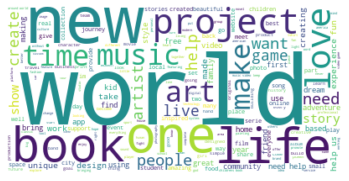

In [ ]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

# concatenate all the reviews into one single string 
full_text = ' '.join(unsuccessfuldf['blurb'])

my_stop_words = ["https", "co", "RT", 'aren', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'rt', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] + list(STOPWORDS)
cloud_no_stopword = WordCloud(background_color='white', stopwords=my_stop_words).generate(full_text)

plt.imshow(cloud_no_stopword, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
from collections import Counter
Counter(" ".join(unsuccessfuldf["blurb"]).split()).most_common(20)

[('help', 10979),
 ('new', 8897),
 ('book', 6794),
 ('world', 6437),
 ('music', 6117),
 ('make', 5611),
 ('life', 5179),
 ('want', 5133),
 ('game', 5024),
 ('first', 4920),
 ('art', 4863),
 ('one', 4823),
 ('need', 4590),
 ('people', 4472),
 ('create', 4390),
 ('project', 4365),
 ('album', 4339),
 ('get', 4231),
 ('love', 4170),
 ('us', 4082)]

In [ ]:
unsuccessfuldf0 = unsuccessfuldf[unsuccessfuldf["Topic"]==0]

In [ ]:
Counter(" ".join(unsuccessfuldf0["blurb"]).split()).most_common(10)

[('game', 3683),
 ('world', 885),
 ('new', 879),
 ('games', 653),
 ('adventure', 652),
 ('play', 606),
 ('fun', 581),
 ('action', 564),
 ('cards', 519),
 ('card', 516)]

In [ ]:
unsuccessfuldf1 = unsuccessfuldf[unsuccessfuldf["Topic"]==1]

In [ ]:
Counter(" ".join(unsuccessfuldf1["blurb"]).split()).most_common(10)

[('book', 4388),
 ('world', 1366),
 ('love', 1193),
 ('art', 1191),
 ('people', 1156),
 ('help', 1093),
 ('children', 1079),
 ('want', 1017),
 ('series', 989),
 ('stories', 953)]

In [ ]:
unsuccessfuldf2 = unsuccessfuldf[unsuccessfuldf["Topic"]==2]

In [ ]:
Counter(" ".join(unsuccessfuldf2["blurb"]).split()).most_common(10)

[('help', 5101),
 ('album', 3991),
 ('music', 3895),
 ('new', 2905),
 ('need', 2453),
 ('make', 1889),
 ('first', 1837),
 ('record', 1577),
 ('project', 1564),
 ('im', 1493)]

In [ ]:
unsuccessfuldf3 = unsuccessfuldf[unsuccessfuldf["Topic"]==3]

In [ ]:
Counter(" ".join(unsuccessfuldf3["blurb"]).split()).most_common(10)

[('food', 1953),
 ('art', 1885),
 ('new', 1475),
 ('help', 1350),
 ('local', 1079),
 ('community', 1064),
 ('music', 861),
 ('want', 739),
 ('create', 732),
 ('artists', 718)]

In [ ]:
unsuccessfuldf4 = unsuccessfuldf[unsuccessfuldf["Topic"]==4]

In [ ]:
Counter(" ".join(unsuccessfuldf4["blurb"]).split()).most_common(10)

[('life', 2370),
 ('story', 2363),
 ('film', 2143),
 ('world', 1678),
 ('series', 1277),
 ('one', 1204),
 ('love', 1138),
 ('young', 1044),
 ('new', 981),
 ('man', 948)]

In [ ]:
unsuccessfuldf5 = unsuccessfuldf[unsuccessfuldf["Topic"]==5]

In [ ]:
Counter(" ".join(unsuccessfuldf5["blurb"]).split()).most_common(10)

[('app', 1971),
 ('new', 1446),
 ('social', 920),
 ('designed', 782),
 ('people', 772),
 ('help', 764),
 ('clothing', 760),
 ('create', 741),
 ('one', 726),
 ('design', 706)]

In [ ]:
unsuccessfuldf6 = unsuccessfuldf[unsuccessfuldf["Topic"]==6]

In [ ]:
Counter(" ".join(unsuccessfuldf6["blurb"]).split()).most_common(10)

[('help', 1540),
 ('want', 1235),
 ('make', 1113),
 ('create', 1040),
 ('people', 683),
 ('quality', 635),
 ('high', 621),
 ('art', 586),
 ('build', 584),
 ('world', 583)]

**SUCCESSFUL BLURBS**

In [ ]:
successfuldf = big_kickstarter[big_kickstarter["state"]==1]

,Unnamed: 0,blurb,state,length,polarity,subjectivity,Topic
1,2,microfly quadcopter packed wifi 6 sensors 3 pr...,1,89,0.000000,1.000000,5
182,183,meow cat box simple clever card game cats boxe...,1,72,0.066667,0.547619,0
183,184,fast fun easytolearn easytoplay strategic card...,1,66,0.075000,0.400000,0
184,185,awesome place play games make friends great fo...,1,58,0.900000,0.875000,3
185,186,trenchworx excited launch third kickstarter ca...,1,77,0.125000,0.250000,2
...,...,...,...,...,...,...,...
215154,215155,smfa students take collaborative art projects ...,1,83,0.166667,0.166667,3
215155,215156,cities installation jen grabarczyk nouf aldah...,1,90,0.000000,0.000000,3
215156,215157,interdisciplinary art project svalbard archipe...,1,75,0.000000,0.000000,3
215157,215158,great poetry book includes art sewd poetry,1,47,0.800000,0.750000,1


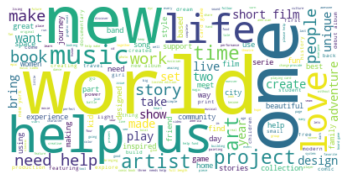

In [ ]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

# concatenate all the reviews into one single string 
full_text = ' '.join(successfuldf['blurb'])

my_stop_words = ["https", "co", "RT", 'aren', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'rt', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] + list(STOPWORDS)
cloud_no_stopword = WordCloud(background_color='white', stopwords=my_stop_words).generate(full_text)

plt.imshow(cloud_no_stopword, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
from collections import Counter
Counter(" ".join(successfuldf["blurb"]).split()).most_common(20)

[('help', 13323),
 ('new', 12181),
 ('album', 6857),
 ('first', 6525),
 ('book', 6113),
 ('film', 6064),
 ('us', 5577),
 ('music', 5510),
 ('world', 5453),
 ('art', 5205),
 ('game', 5092),
 ('make', 4815),
 ('one', 4558),
 ('life', 4440),
 ('need', 4402),
 ('story', 4305),
 ('get', 4207),
 ('project', 3910),
 ('love', 3894),
 ('short', 3487)]

In [ ]:
successfuldf0 = successfuldf[successfuldf["Topic"]==0]

In [ ]:
Counter(" ".join(successfuldf0["blurb"]).split()).most_common(10)

[('game', 4093),
 ('new', 1518),
 ('card', 1318),
 ('cards', 1048),
 ('fantasy', 909),
 ('world', 909),
 ('players', 884),
 ('games', 883),
 ('playing', 867),
 ('adventure', 827)]

In [ ]:
successfuldf1 = successfuldf[successfuldf["Topic"]==1]

In [ ]:
Counter(" ".join(successfuldf1["blurb"]).split()).most_common(10)

[('book', 3829),
 ('art', 1210),
 ('stories', 956),
 ('world', 858),
 ('help', 853),
 ('love', 786),
 ('new', 691),
 ('story', 686),
 ('one', 674),
 ('project', 673)]

In [ ]:
successfuldf2 = successfuldf[successfuldf["Topic"]==2]

In [ ]:
Counter(" ".join(successfuldf2["blurb"]).split()).most_common(10)

[('help', 7316),
 ('album', 6436),
 ('new', 4809),
 ('music', 3344),
 ('record', 2940),
 ('first', 2832),
 ('need', 2829),
 ('us', 2270),
 ('make', 2036),
 ('recording', 2035)]

In [ ]:
successfuldf3 = successfuldf[successfuldf["Topic"]==3]

In [ ]:
Counter(" ".join(successfuldf3["blurb"]).split()).most_common(10)

[('new', 2454),
 ('art', 2125),
 ('help', 2040),
 ('dance', 1460),
 ('community', 1184),
 ('us', 1106),
 ('music', 1025),
 ('festival', 1018),
 ('food', 1017),
 ('artists', 1017)]

In [ ]:
successfuldf4 = successfuldf[successfuldf["Topic"]==4]

In [ ]:
Counter(" ".join(successfuldf4["blurb"]).split()).most_common(10)

[('film', 4345),
 ('story', 2741),
 ('short', 2600),
 ('life', 2257),
 ('world', 1698),
 ('young', 1523),
 ('one', 1455),
 ('documentary', 1441),
 ('love', 1439),
 ('new', 1384)]

In [ ]:
successfuldf5 = successfuldf[successfuldf["Topic"]==5]

In [ ]:
Counter(" ".join(successfuldf5["blurb"]).split()).most_common(10)

[('made', 1065),
 ('designed', 986),
 ('new', 910),
 ('design', 818),
 ('first', 675),
 ('use', 477),
 ('worlds', 475),
 ('one', 471),
 ('wallet', 453),
 ('leather', 443)]

In [ ]:
successfuldf6 = successfuldf[successfuldf["Topic"]==6]

In [ ]:
Counter(" ".join(successfuldf6["blurb"]).split()).most_common(10)

[('help', 1170),
 ('make', 669),
 ('create', 530),
 ('high', 523),
 ('made', 468),
 ('quality', 465),
 ('us', 425),
 ('new', 415),
 ('want', 412),
 ('build', 404)]

Unsuccessful:

[('help', 10979),
 ('new', 8897),
 ('book', 6794),
 ('world', 6437),
 ('music', 6117),
 ('make', 5611),
 ('life', 5179),
 ('want', 5133),
 ('game', 5024),
 ('first', 4920),
 ('art', 4863),
 ('one', 4823),
 ('need', 4590),
 ('people', 4472),
 ('create', 4390),
 ('project', 4365),
 ('album', 4339),
 ('get', 4231),
 ('love', 4170),
 ('us', 4082)]

Successful:

[('help', 13323),
 ('new', 12181),
 ('album', 6857),
 ('first', 6525),
 ('book', 6113),
 ('film', 6064),
 ('us', 5577),
 ('music', 5510),
 ('world', 5453),
 ('art', 5205),
 ('game', 5092),
 ('make', 4815),
 ('one', 4558),
 ('life', 4440),
 ('need', 4402),
 ('story', 4305),
 ('get', 4207),
 ('project', 3910),
 ('love', 3894),
 ('short', 3487)]


Quality of product ultimately determines whether it is successful or not. A well written blurb may attract a user to purchase a product, but it is the quality of it that decides if the user likes it or not 

# **8. Examine whether Wordiness of a blurb may affect the project description because too little or too many words would make the product not as intuitive.**

In [ ]:
big_kickstarter.length.describe()

count    215510.000000
mean         87.642355
std          20.891157
min           0.000000
25%          78.000000
50%          92.000000
75%         102.000000
max         146.000000
Name: length, dtype: float64

In [ ]:
big_kickstarter[big_kickstarter["length"]==0]

,Unnamed: 0,blurb,state,length,polarity,subjectivity,Topic
21716,21717,,0,0,0.0,0.0,0


In [ ]:
big_kickstarter[big_kickstarter["length"]==146]

,Unnamed: 0,blurb,state,length,polarity,subjectivity,Topic
160563,160564,focused determined deliver quality heart felt ...,0,146,0.35,0.55,3


In [ ]:
#Label 0-30 as 1 31-60 as 2 etc...
#polarity 1 means positive -1 means negative
#Subjectivity 1 means personal opinion and 0 is factual
bins = [0,30,60,90,120,150] 
labels=[1,2,3,4,5] 
big_kickstarter["catlength"] = pd.cut(big_kickstarter["length"], bins=bins, labels=labels, include_lowest=True)

,Unnamed: 0,blurb,state,length,polarity,subjectivity,Topic,catlength
0,1,using character users go educational quests ar...,0,107,0.250000,0.250000,0,4
1,2,microfly quadcopter packed wifi 6 sensors 3 pr...,1,89,0.000000,1.000000,5,3
2,3,small indie press run collective authors want ...,0,87,0.192857,0.608571,1,3
3,4,zylor new baby cosplayer back kickstarter help...,0,96,0.090909,0.303030,6,4
4,5,hatoful boyfriend meet skeletons comedy dating...,0,97,0.255000,0.545000,4,4
...,...,...,...,...,...,...,...,...
215508,215509,new designer approach family wall art holiday ...,0,98,0.167424,0.305303,1,4
215509,215510,im looking build urban youth center help keep ...,0,86,-0.050000,0.050000,3,3
215510,215511,plan create realistic accurate reconstruction ...,0,86,0.283333,0.483333,6,3
215511,215512,create unique fantastic gifts mash works art p...,0,95,0.303788,0.784848,1,4


In [ ]:
subj1 = big_kickstarter[((big_kickstarter["subjectivity"]==1) & (big_kickstarter["state"]==1))]

,Unnamed: 0,blurb,state,length,polarity,subjectivity,Topic,catlength
1,2,microfly quadcopter packed wifi 6 sensors 3 pr...,1,89,0.000000,1.0,5,3
186,187,soundscapes around mysterious borderlands cast...,1,84,0.000000,1.0,0,3
189,190,range 28mm figures cover boxer rebellion inclu...,1,105,0.500000,1.0,0,4
201,202,magic mineral pools rpgs skirmish war games etc,1,47,0.500000,1.0,0,2
231,232,twopart liveaction comical shortfilm series wr...,1,91,0.500000,1.0,4,4
...,...,...,...,...,...,...,...,...
215092,215093,project fund multistate road trip research doc...,1,98,1.000000,1.0,1,4
215101,215102,made shirts final people wanted want sell shir...,1,72,0.000000,1.0,6,3
215129,215130,miko kuros midnight tea collaborative art happ...,1,109,0.375000,1.0,3,4
215144,215145,four students glass department rhode island sc...,1,104,0.000000,1.0,3,4


In [ ]:
subj0 = big_kickstarter[((big_kickstarter["subjectivity"]==0) & (big_kickstarter["state"]==1))]

,Unnamed: 0,blurb,state,length,polarity,subjectivity,Topic,catlength
192,193,risky adventure player plays team 3 adventurer...,1,101,0.0,0.0,0,4
208,209,5x5 rpg map tiles 5th edition roleplaying game...,1,99,0.0,0.0,0,4
226,227,hank sid fed dilettante theater theyre determi...,1,98,0.0,0.0,3,4
228,229,airhead beauty transformed vision dancing sing...,1,103,0.0,0.0,3,4
244,245,three vignettes viewers become privy goingson ...,1,72,0.0,0.0,4,3
...,...,...,...,...,...,...,...,...
215148,215149,crew artists scholars im going expedition arct...,1,90,0.0,0.0,6,3
215149,215150,festival performance time based arts festival ...,1,132,0.0,0.0,3,5
215152,215153,burning man 2011 created mutant vehicle would ...,1,105,0.0,0.0,3,4
215155,215156,cities installation jen grabarczyk nouf aldah...,1,90,0.0,0.0,3,3


In [ ]:
X = big_kickstarter[['polarity', 'subjectivity','catlength']]
y = big_kickstarter['state']

In [ ]:
#75% of data will be used as model training
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sn
import matplotlib.pyplot as plt
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)

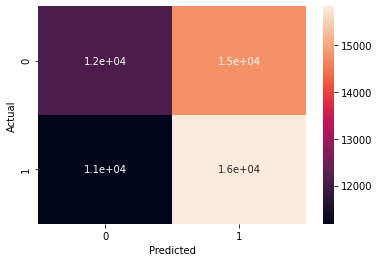

In [ ]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

In [ ]:
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.5183191655221056


RERUNNING THE MODEL WITHOUT CATEGORICAL LENGTH

In [ ]:
X = big_kickstarter[['polarity', 'subjectivity']]
y = big_kickstarter['state']

In [ ]:
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)

In [ ]:
#75% of data will be used as model training
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

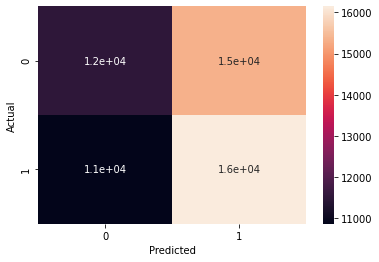

In [ ]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

In [ ]:
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.5134934481606592


SUBJECTIVITY

In [ ]:
X = big_kickstarter['subjectivity']
y = big_kickstarter['state']

In [ ]:
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)

In [ ]:
#75% of data will be used as model training
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

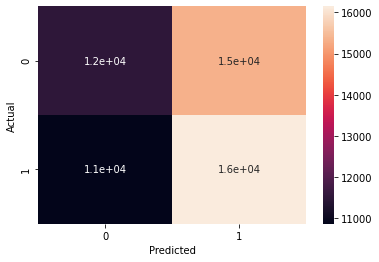

In [ ]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

In [ ]:
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.5134934481606592


# **9. IMPLEMENTING KNN**

In [ ]:
X = big_kickstarter[['polarity', 'subjectivity']]
y = big_kickstarter['state']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5, algorithm = "brute")
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[12936  8263]
 [12837  9066]]
              precision    recall  f1-score   support

           0       0.50      0.61      0.55     21199
           1       0.52      0.41      0.46     21903

    accuracy                           0.51     43102
   macro avg       0.51      0.51      0.51     43102
weighted avg       0.51      0.51      0.51     43102



accuracy = (12936+9066)/total = 51%

# **10. IMPLEMENTING NAIVE BAYES**

In [ ]:
big_kickstarter.head()

,Unnamed: 0,blurb,state,blurb_adjective
0,1,using character users go educational quests ar...,0,"using, character, users, go, educational, ques..."
1,2,microfly quadcopter packed wifi 6 sensors 3 pr...,1,"microfly, quadcopter, packed, wifi, 6, sensors..."
2,3,small indie press run collective authors want ...,0,"small, indie, press, run, collective, authors,..."
3,4,zylor new baby cosplayer back kickstarter help...,0,"zylor, new, baby, cosplayer, back, kickstarter..."
4,5,hatoful boyfriend meet skeletons comedy dating...,0,"hatoful, boyfriend, meet, skeletons, comedy, d..."


In [ ]:
# define X - predictor and y - label
X = big_kickstarter.blurb
y = big_kickstarter.state

In [ ]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [ ]:
#inspect the training and testing data
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(161634,)
(53879,)
(161634,)
(53879,)


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()

In [ ]:
# fit and transform X_train into X_train_dtm
X_train_dtm = vect.fit_transform(X_train)
X_train_dtm.shape

(161634, 110387)

In [ ]:
# transform X_test into X_test_dtm
X_test_dtm = vect.transform(X_test)
X_test_dtm.shape

(53879, 110387)

In [ ]:
# import and instantiate MultinomialNB
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [ ]:
# train the model using X_train_dtm
nb.fit(X_train_dtm, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
# make class predictions for X_test_dtm
y_pred_class = nb.predict(X_test_dtm)

In [ ]:
# calculate accuracy score of class predictions
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_class)

0.6673657640268008

In [ ]:
# print the confusion matrix
# TP FN
# FP TN

#True P or N - Guessed correctly
#False P or N - Guessed wrong, and it's the other result



metrics.confusion_matrix(y_test, y_pred_class)

array([[17904,  8968],
       [ 8954, 18053]])

In [ ]:
#Precision Score
from sklearn.metrics import precision_score
precision_score(y_test, y_pred_class)

0.6681099885274416